#Predice Infartos-Inador
##Carga de datos
[Dataset de los accidentes cardiovasculares letales/no letales](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
dataframe=pd.read_csv('heart_failure_clinical_records_dataset.csv',sep=',', header=0)
dataframe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##Modificacion de los datos

### Se realiza el split de los datos

In [ ]:
from sklearn.model_selection import train_test_split
data=dataframe.values
#print(data.shape)
Death=data[:,12]
X=data[:,0:12]
Xtotal=X
ytotal=Death
X_train, X_test, y_train, y_test = train_test_split(Xtotal, ytotal, random_state=0)



### Escalizado de datos
Se prueban diferentes opciones de escalizado para los datos, se consideran la Standar, Min Max y Robust como las mas apropiadas para este proyecto

Standar Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


##Logistic regression
Como se propone comprobar diferentes modelos, dado que es un problema de aprendizaje supervisado, la primera opcion es la regresion logistica.

In [ ]:
#Se crea la funcion guess_C para obtener el mejor valor de regularizacion, evaluado mediante MCC
def guess_C(init, end, jump,penal , random, X_train,y_train,X_test,y_test):
  score = 0
  reg=0
  for x in np.linspace(init, end, num=jump):
    LR = LogisticRegression(penalty=penal, C=x,random_state=random)
    LR.fit(X_train, y_train)
    y_test_predicted = LR.predict(X_test)
    y_test_scores = LR.predict_proba(X_test)
    MCC = matthews_corrcoef(y_test, y_test_predicted)
    #Linea por si se desea evaluar netamente el Accuracy
    #ACC = accuracy_score(y_test, y_test_predicted)
    if(MCC>score):
        score = MCC
        reg=x
  return score,reg

In [ ]:


#declaro la penalizacion
pen='l2'
score,reg = guess_C(0.1, 2, 200,pen , 0, X_train,y_train,X_test,y_test)

#entreno
LR = LogisticRegression(penalty='l2', C=reg,random_state=0)
LR.fit(X_train, y_train)

print("Mejor MCC de ",score)
print("Conseguido con regularizacion de",reg)



Mejor MCC de  0.5228131741408373
Conseguido con regularizacion de 0.4150753768844221


In [ ]:
#Definicion de funcion de plot para la ROC a partir de y_test y y_test_scores
def plot_ROC(y_test,y_test_scores):
  fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
  roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic. ROC')
  plt.legend(loc="lower right")
  plt.show()


##Resultados de Logistic Regression

matthews_corrcoef 0.4909206851568567
Accuracy 0.7733333333333333


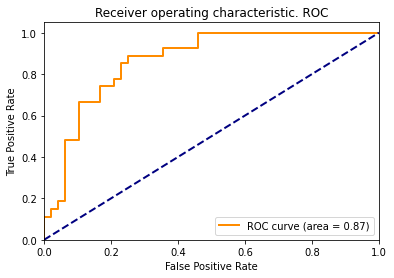

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

y_test_predicted = LR.predict(X_test)
y_test_scores = LR.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
plot_ROC(y_test,y_test_scores)



##SVM
La siguiente opcion despues de Logistic Regresion son las maquinas de soporte vectorial o SVM, para seleccionar la mejor se prueban diferentes kernel y se muestran las metricas deseadas para decidir el mejor kernel para el proyecto


In [ ]:
from sklearn import svm
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

kernels=['linear', 'poly', 'rbf', 'sigmoid']
#kernel lineal

Kernel=0
machine = svm.SVC(kernel=kernels[Kernel])
machine.fit(X_train, y_train)
#Obtengo e imprimo los score
y_test_predicted = machine.predict(X_test)
y_test_scores = machine.decision_function(X_test)
print("\n**RESULTS FOR ",kernels[Kernel]," KERNEL***");
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",kernels[Kernel], ACC)


#kernel polinomial cuadrático
Kernel=1
machine = svm.SVC(kernel=kernels[Kernel],degree=2)
machine.fit(X_train, y_train)
#Obtengo e imprimo los score
y_test_predicted = machine.predict(X_test)
y_test_scores = machine.decision_function(X_test)
print("\n**RESULTS FOR ",kernels[Kernel],"2 KERNEL***");
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],"degree 2",MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",kernels[Kernel],"degree2", ACC)


#kernel polinomial cúbico
Kernel=1
machine = svm.SVC(kernel=kernels[Kernel],degree=3)
machine.fit(X_train, y_train)
#Obtengo e imprimo los score
y_test_predicted = machine.predict(X_test)
y_test_scores = machine.decision_function(X_test)
print("\n**RESULTS FOR ",kernels[Kernel],"3 KERNEL***");
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],"degree 3",MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",kernels[Kernel],"degree3", ACC)

#kernel sigmoide
Kernel=3
machine = svm.SVC(kernel=kernels[Kernel])
machine.fit(X_train, y_train)
#Obtengo e imprimo los score
y_test_predicted = machine.predict(X_test)
y_test_scores = machine.decision_function(X_test)
print("\n**RESULTS FOR ",kernels[Kernel]," KERNEL***");
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",kernels[Kernel], ACC)

#kernel rbf
Kernel=2
machine = svm.SVC(kernel=kernels[Kernel])
machine.fit(X_train, y_train)
#Obtengo e imprimo los score
y_test_predicted = machine.predict(X_test)
y_test_scores = machine.decision_function(X_test)
print("\n**RESULTS FOR ",kernels[Kernel]," KERNEL***");
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",kernels[Kernel], ACC)




**RESULTS FOR  linear  KERNEL***
matthews_corrcoef linear 0.5228131741408373
Accuracy linear 0.7866666666666666

**RESULTS FOR  poly 2 KERNEL***
matthews_corrcoef poly degree 2 0.06496495357242561
Accuracy poly degree2 0.6266666666666667

**RESULTS FOR  poly 3 KERNEL***
matthews_corrcoef poly degree 3 0.40688576184834985
Accuracy poly degree3 0.7333333333333333

**RESULTS FOR  sigmoid  KERNEL***
matthews_corrcoef sigmoid 0.5541466051858356
Accuracy sigmoid 0.8

**RESULTS FOR  rbf  KERNEL***
matthews_corrcoef rbf 0.5850371197585715
Accuracy rbf 0.8133333333333334


##Resultados para SVM

matthews_corrcoef rbf 0.5850371197585715
Accuracy rbf 0.8133333333333334


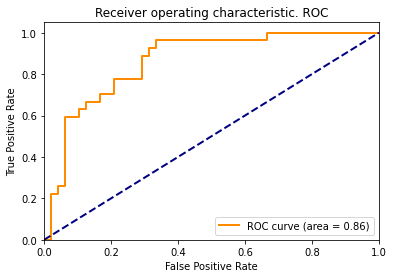

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",kernels[Kernel], ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

##KNN

Max score  0.7733333333333333
found at k =  10


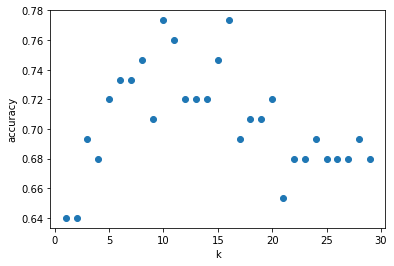

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

k_range = range(1, 30)
scores = []
max_score=0
max_score_k=0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance', metric_params=None,algorithm='brute')
    knn.fit(X_train, y_train)
    score=knn.score(X_test, y_test)
    if(score>max_score):
      max_score=score
      max_score_k=k
    scores.append(score)
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30])
print("Max score ",max_score)
print("found at k = ",max_score_k)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric


n_neighbors = max_score_k
knn = KNeighborsClassifier(n_neighbors,weights='distance', metric_params=None,algorithm='brute')
knn.fit(X_train, y_train)

#Obtengo e imprimo los score
y_test_predicted = knn.predict(X_test)
y_test_scores = knn.predict_proba(X_test)


##Resultados KNN

matthews_corrcoef rbf 0.4231139606876776
Accuracy KNN 0.7466666666666667


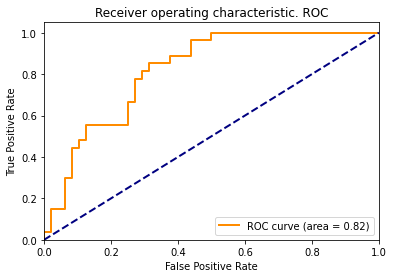

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",kernels[Kernel],MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy","KNN",ACC)
#Se asigna a y_test_scoresROC el valor de los scores necesario apra calcular la ROC, ya que KNN devuelve dos filas, la prob de clase1 y prob de clase0
y_test_scoresROC=y_test_scores[:,1]

fpr,tpr,thresholds = roc_curve(y_test, y_test_scoresROC)
roc_auc=roc_auc_score(y_test, y_test_scoresROC)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

##Redes neuronales

In [ ]:
from keras.models import Sequential #Librería para cre#Librería para crear las capas con neuronasar el modelo de las neuronas
from keras.layers import Dense #Librería para crear las capas con neuronas
from keras.utils import plot_model #Se importa la librería para hacer gráficos varios de las funciones de keras

nn_model = Sequential() #Definición del modelo
activations=['relu', 'sigmoid', 'softmax', 'tanh']
activate=0

nn_model.add(Dense(9,input_dim = 12,activation = activations[activate],use_bias = 1))
nn_model.add(Dense(9,               activation = activations[activate],use_bias = 1))
nn_model.add(Dense(9,               activation = activations[activate],use_bias = 1))
nn_model.add(Dense(9,               activation = activations[activate],use_bias = 1))
nn_model.add(Dense(1,               activation = activations[1],use_bias = 1))#last using sigmoid

#"The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer" acording to profesor https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.
#Therefore number of neurons should be 9

In [ ]:
nn_model.compile(loss = 'mean_squared_error',optimizer = 'nadam') #Se usará como función de pérdidas la el error medio cuadrado con un optimizador de NAdam https://keras.io/api/optimizers/Nadam/ 

Train = nn_model.fit(X_train, y_train, epochs = 200,batch_size = 20,verbose=1) 

#nn_model.summary() #Imprime la información del modelo de neuronas

Epoch 1/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 2/200
12/12 [==============================] - 0s 1ms/step - loss: 0.2609
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2577
Epoch 4/200
12/12 [==============================] - 0s 1ms/step - loss: 0.2546
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2518
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 7/200
12/12 [==============================] - 0s 1ms/step - loss: 0.2474
Epoch 8/200
12/12 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2433
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 11/200
12/12 [==============================] - 0s 1ms/step - loss: 0.2394
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2379
Epoch 13/200
12/12 [=================

In [ ]:
def Prob_to_discrete(nn_y_test_pred):
  y_test_predicted_neuron=[]
  for x in nn_y_test_pred:
    if(x>.5):
      y_test_predicted_neuron.append(1)
    else:
      y_test_predicted_neuron.append(0)
  y_test_predicted=np.array(y_test_predicted_neuron)   
  return y_test_predicted

In [ ]:
nn_y_train_pred = nn_model.predict(X_train) #Predicción de las etiquetas de X_train
nn_y_test_pred = nn_model.predict(X_test) #Predicción de las etiquetas de X_test
y_test_predicted=Prob_to_discrete(nn_y_test_pred)


MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef",MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy",ACC)


matthews_corrcoef 0.44593073584991844
Accuracy 0.7466666666666667


#Conclusiones
*   Al final se obtiene un algoritmo con la capacidad de detectar con un 81% de accuracy si un paciente con unas características específicas fallece a causa de sufrir una falla cardiaca, aunque es deseable un valor mayor de accuracy, este ha sido el máximo conseguible para esta aplicación.
*   Teniendo en cuenta el Accuracy, la ROC y el MCC de 0.58 en el modelo, se puede afirmar que el modelo es capaz de clasificar de forma correcta ya sea como positivo o como negativo a la mayoría de los pacientes, lo cual sirve como una herramienta útil para la detección temprana de riesgos mortalidad asociados a falla cardiaca, por ende se considera logrado el objetivo

*   Dada la aplicacion se considera mas importante que no hayan falsos negativos (la prediccion de que un paciente no esta en riesgo de padecer un ataque cardiaco letal, cuando en realidad si lo esta) que falsos positivos, por lo que la seleccion del modelo tiene esto en cuenta.

*   Una de las razones para escoger MCC sobre F1 es debido a su formula, mientras que el F1 analiza los casos positivos, lo cual es bastante util, el MCC analiza tambien los casos negativos. Esto permite obtener una mayor certeza sobre los negativos, ya que queremos disminuir el numero de falsos negativos asi como tener un buen numero de verdaderos positivos.
*   Despues de repetir las pruebas por todos los clasificadores con las diferentes escalizaciones, se verifica que la escalizacion estandar es la mas adecuada para la aplicacion, esto tiene sentido dado que para los diferentes datos medicos provistos tienen diferentes significados los valores, como un valor alto en una caracteristica es positivo mientras en otra lo contrario, tras realizar la verificacion contra el robust que centralizaba y removia la mediana, se comprueba que estos datos son significativos, asi que se escoge la escalizacion estandar.

